# Fast Multiplication Example on Slide 17/30

In [2]:
a = [13; 10; 0; 0];
b = [15;  5; 0; 0];
A = fft(a)
B = fft(b)

A =

   23 +  0i
   13 - 10i
    3 +  0i
   13 + 10i

B =

   20 +  0i
   15 -  5i
   10 +  0i
   15 +  5i



In [72]:
A.*B
ab = ifft(A.*B)

ans =

   20 +  0i
   15 -  5i
   10 +  0i
   15 +  5i

ab =

   15
    5
    0
    0



In [6]:
195+215*16+50*16^2 - 173*95

ans = 0


# FFT of a sin-wave (Ex. 4 in Exercise_04)

In [61]:
fsHz = 8192;                  % sampliing frequency in Hz
dur  = 3;                     % duration of sample (in seconds)
fHz  = 440;                   % frequency of sin-wave in Hz
A    = 1;                     % Amplitude of sin-wave
dt   = 1/fsHz;                % sample period
ts   = 0:dt:dur-dt;           % sample times

In [63]:
f    = A * sin(2*pi*fHz*ts);  % compute sound signal at sample times
whos f

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        f           1x24576                 196608  double

Total is 24576 elements using 196608 bytes



In [64]:
audiowrite("sound01.wav", f, fsHz)

In [65]:
system('play sound01.wav')


sound01.wav:

 File Size: 49.2k     Bit Rate: 131k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 8192Hz       
Replaygain: off         
  Duration: 00:00:03.00  

In:100%  00:00:03.00 [00:00:00.00] Out:144k  [!=====|=====!] Hd:0.0 Clip:8    
play WARN rate: rate clipped 4 samples; decrease volume?
play WARN sox: `coreaudio' output clipped 4 samples; decrease volume?
Done.
ans = 0


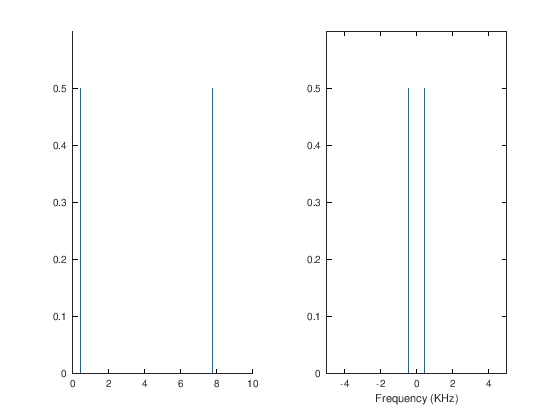

In [66]:
N = fsHz*dur;
F = fft(f,N)/N;
absF = abs(F);
Faxis = linspace(-fsHz/2,fsHz/2,N);
figure(1)
clf
subplot(1,2,1)
plot(linspace(0,fsHz,N)/1000,absF)
box off
axis([0 10 0 0.6])
subplot(1,2,2)
plot(Faxis/1000,fftshift(absF))
axis([-5 5 0 0.6])
xlabel('Frequency (KHz)')

# Rectangular 1D signal - localization property

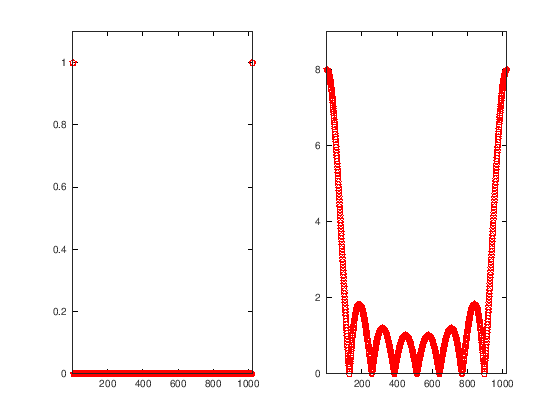

In [105]:
N  = 1024;
M = 8;

x1 = [ones(M/2,1)' zeros(N-M,1)' ones(M/2,1)']';
clf
figure(1)
subplot(1,2,1)
plot(1:N,x1,'rp'), axis([1 N 0 1.1])
X1 = fft(x1);
subplot(1,2,2)
plot(1:N,abs(X1),'rp'), axis([1 N 0 9])

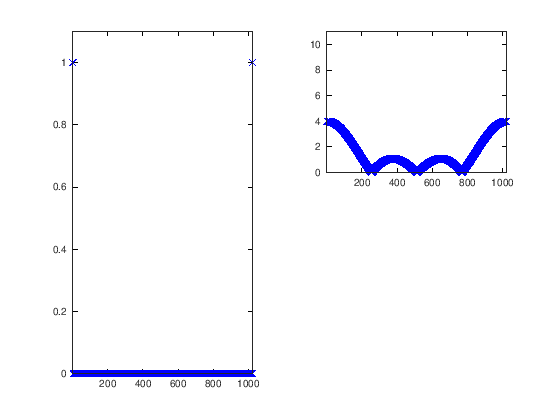

In [106]:
M  = 4;
x2 = [ones(M/2,1)' zeros(N-M,1)' ones(M/2,1)']';
subplot(1,2,1)
plot(1:N,x2,'bx'), axis([1 N 0 1.1])
X2 = fft(x2);
subplot(2,2,2)
plot(1:N,abs(X2),'bx'), axis([1 N 0 11])

It can be shown that the more localized the function is, i.e. the smaller the region where $f(x)\neq 0$, the more widespread the fourier transform. As an extreme case, the fourier transform of a sequence $[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]$ is a constant sequence. Can You verify this analytically?

In [116]:
x = [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0];
X = fft(x)

X =

   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1



# Circular convolution

For "circonv" to work correctly, the $x$ and $y$ need to be columns vectors.

In [90]:
x = [1 2 4 5 6]';
y = [7 8 9 3 0]';

In [91]:
function c = circonv(x,y)
  
  N = size(x,1);

  if (size(y,1) != N)
    printf("ERROR .... ");
  end

  c = size(N,1);

  for n = 1:N
    sum = 0;
    for k = 1:N
      m = mod(n-k,N);
      sum += x(k)*y(m+1);
    end
    c(n) = sum;
  end
end

In [92]:
c = circonv(x,y)

c =

   112    91    71    88   124



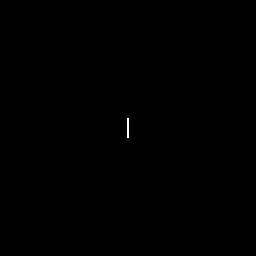

In [101]:
M = 256;
N = 256;
f = zeros(M,N);
M1 = 20;
N1 = 2;
f(M/2-M1/2+1:M/2+M1/2, N/2-N1/2+1:N/2+N1/2) = 1;
figure(1)
subplot(2,2,1)
imshow(f)

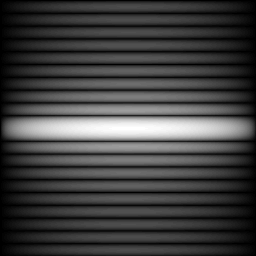

In [102]:
F = fft2(f);
subplot(2,2,2)
imshow(log(1+abs(fftshift(F))),[])